In [1]:
from algoritmo_genetico.pos import *
from plotly import express as px
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from matplotlib import patches

In [2]:
grupos = {'A':'Immune','B':'Susceptible','C':'Highly Susceptible'}

In [3]:
# vertices con estructura de comunidad
vertices,edges=read("grafo_grado_12.graph")
grado_grupo =np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})

In [4]:
G=convert_vertices_to_graph(vertices,edges)

In [5]:
print("Homofilia",homofilia(G))
print("-"*30)
print("Asortatividad",assor(G))
print("-"*30)
print("Porcentaje comunicación")
print(mixing_matrix(G))

Homofilia 0.9878589007383101
------------------------------
Asortatividad 0.9908941648298901
------------------------------
Porcentaje comunicación
[[0.32912223 0.00221493 0.00254307]
 [0.00221493 0.32912223 0.00131255]
 [0.00254307 0.00131255 0.32961444]]


In [6]:
# parametros modelo
modelo='g_m_v'
T=300
psi=0.96
nu=0.9
mu=0.3
lamda={'A':0,'B':0.005,'C':0.05}

In [7]:
# inicializacion uniforme aleatoria del miedo al crimen
s0=np.random.rand(len(vertices))

/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



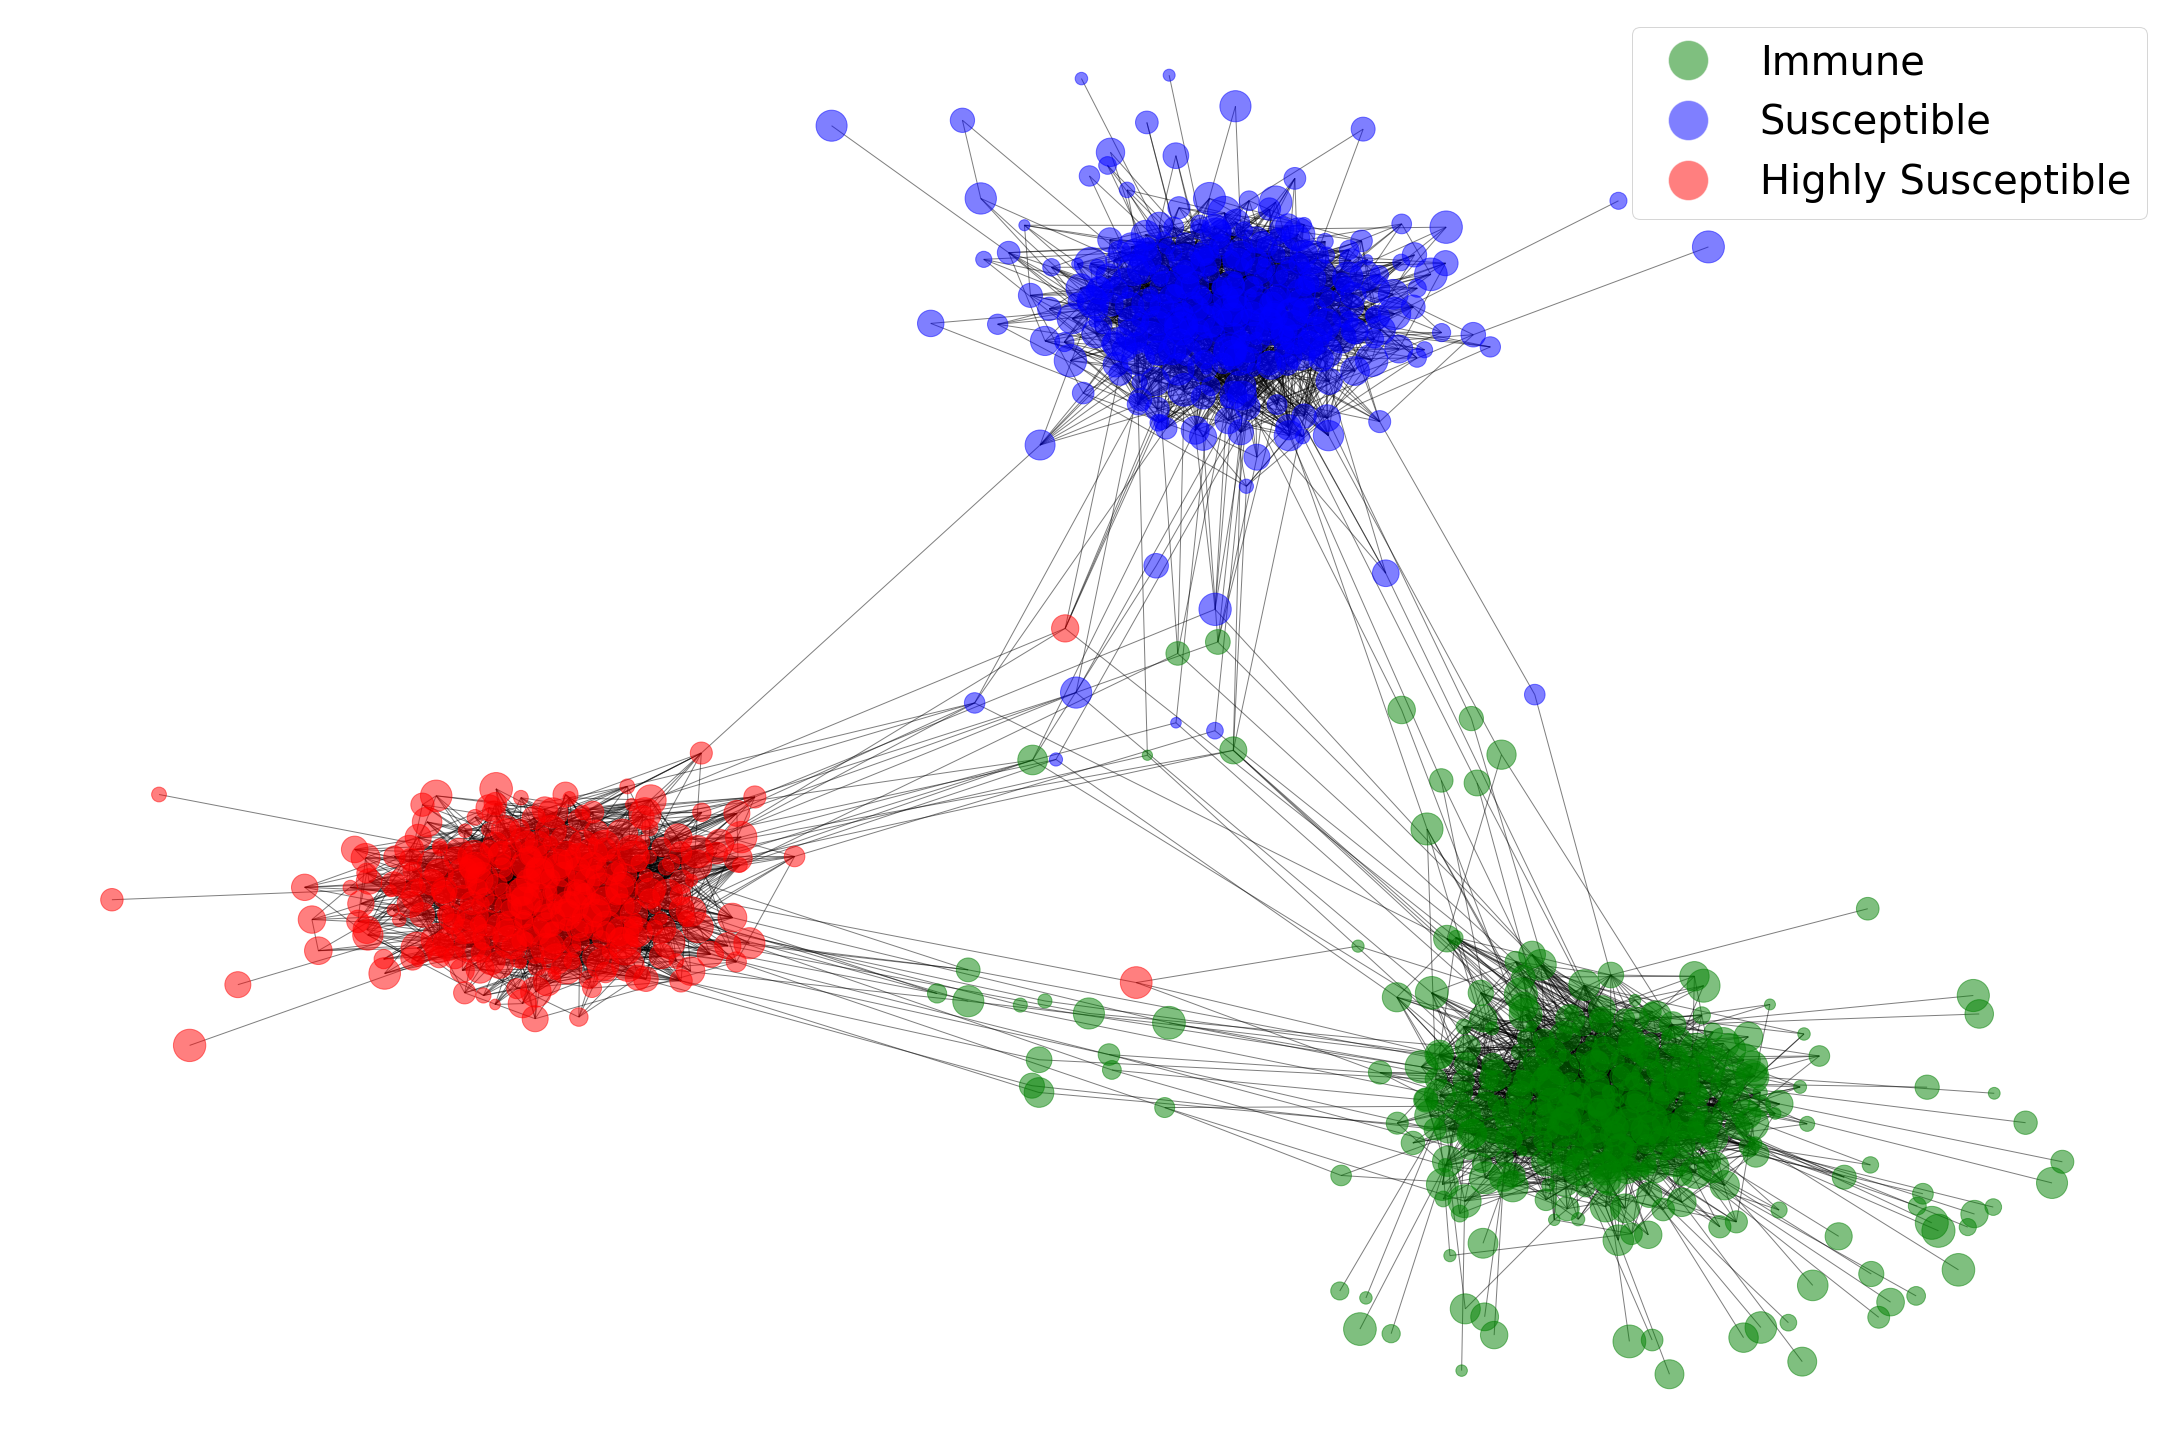

In [8]:
draw_graph(G,s0,legends=grupos)

In [9]:
# Simulación miedo al crimen
S,conteo=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo,contar=True)
S=S.T
V['conections']=conteo

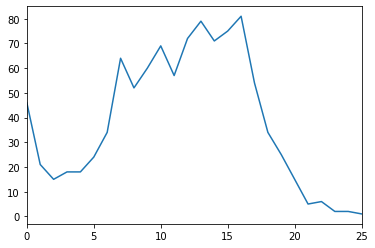

In [10]:
V.groupby('Grade').count().reset_index().Group.plot()

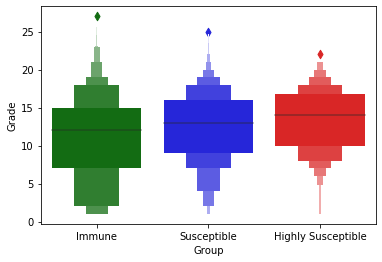

In [11]:
grade_violin=sns.boxenplot(data=V,y='Grade',x='Group',order=list(grupos.values()),palette=['g','b','r'],saturation=0.7)

In [12]:
# Distibucion grado de los nodos por grupos
fig=px.violin(V,y='Grade',box=True,color='Group',category_orders={'Group':list(grupos.values())})
fig.show()

In [13]:
# indices de cada grupo con maximo grado, minimo grado y uno aleatorio
index_examples=[]
for g in grupos.values():
    index_examples.append([V[V.Group == g].Grade.idxmax(),V[V.Group == g].Grade.idxmin(),V[V.Group == g].Grade.sample().index[0]])

In [14]:
## Convertir a formato que lee plotly
X=pd.DataFrame(index=np.arange(T*9))
X['Fear']=np.array([list(S[index_examples[i]].flatten()) for i in range(len(index_examples))]).flatten()
X['Time']=list(np.arange(T))*9
X['Group']=np.array([[list(grupos.values())[i]]*3*T for i in range(len(grupos))]).flatten()
X['Grade nodes']=(['max']*T+['min']*T+['random']*T)*3

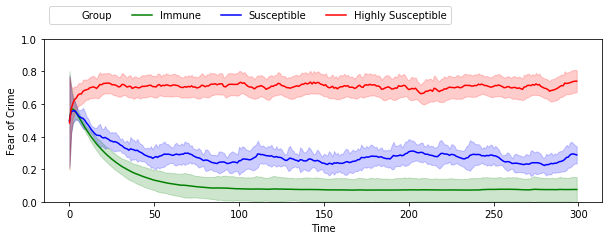

0.3288600200777335

In [15]:
plot(vertices,s0,lamda=lamda,psi=psi,nu=nu,
     mu=mu,modelo=modelo,T=T,draw=True,legends=grupos)

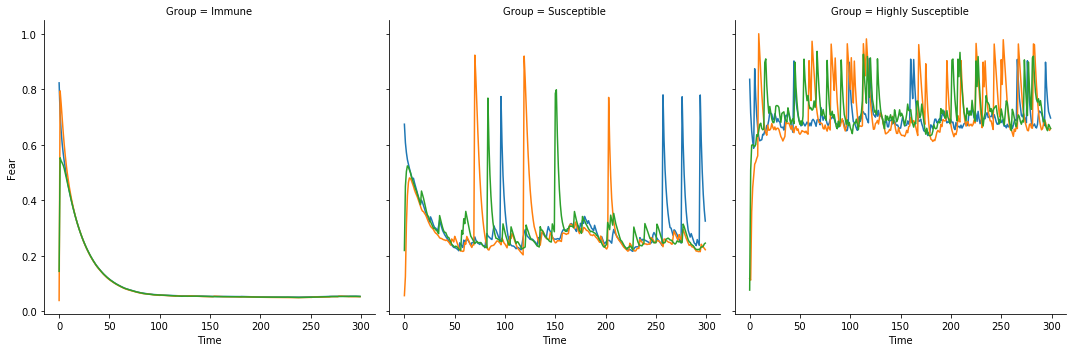

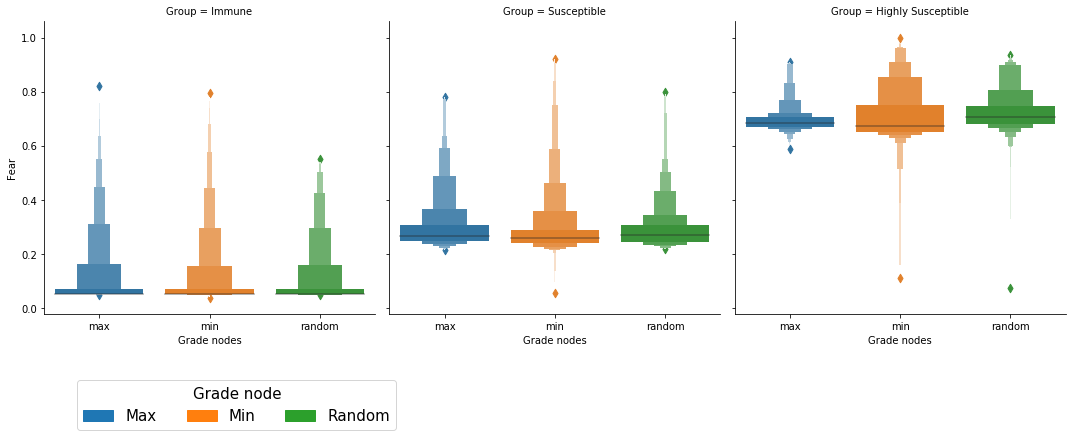

In [16]:
colors=sns.color_palette()[:3]
a=sns.relplot(data=X,x='Time',y='Fear',hue='Grade nodes',col='Group',kind='line',legend=False,palette=colors)
a=sns.catplot(data=X,y='Fear',x='Grade nodes',col='Group',kind='boxen',legend_out=True,palette=colors)
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,['Max','Min','Random'])]
plt.legend(handles=handles,title='Grade node',loc='best',ncol=3,
           fontsize='15',
           title_fontsize='15',
           bbox_to_anchor=(-1,-0.2))
plt.show()

In [17]:
fig=px.line(X,x='Time',y='Fear',color='Grade nodes',range_y=[0,1],range_x=[0,T],facet_row='Group')
fig.show()

In [18]:
fig=px.violin(X,y='Fear',color='Grade nodes',facet_row='Group',category_orders={'Group':list(grupos.values())})
fig.show()

In [19]:
## modelo sin grafo
modelo='random'

In [20]:
# Simulación miedo al crimen
S,conteo=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo,contar=True)
S=S.T
V['conections']=conteo

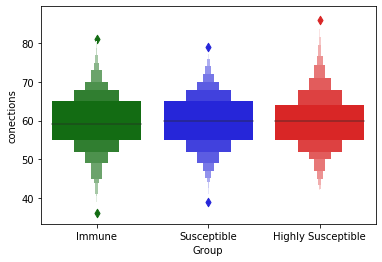

In [21]:
grade_violin=sns.boxenplot(data=V,y='conections',x='Group',order=list(grupos.values()),palette=['g','b','r'],saturation=0.7)

In [22]:
# Distibucion conexiones de los nodos por grupos en la simulacion
fig=px.violin(V,y='conections',box=True,color='Group',category_orders={'Group':list(grupos.values())})
fig.show()

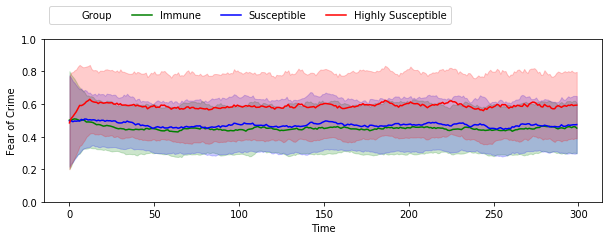

0.4997315005132581

In [23]:
plot(vertices,s0,lamda=lamda,psi=psi,nu=nu,
     mu=mu,modelo=modelo,T=T,draw=True,legends=grupos)

In [24]:
# indices de cada grupo con maximo grado, minimo grado y uno aleatorio
index_examples=[]
for g in grupos.values():
    index_examples.append([V[V.Group == g].conections.idxmax(),V[V.Group == g].conections.idxmin(),V[V.Group == g].conections.sample().index[0]])

In [25]:
## Convertir a formato que lee plotly
X=pd.DataFrame(index=np.arange(T*9))
X['Fear']=np.array([list(S[index_examples[i]].flatten()) for i in range(len(index_examples))]).flatten()
X['Time']=list(np.arange(T))*9
X['Group']=np.array([[list(grupos.values())[i]]*3*T for i in range(len(grupos))]).flatten()
X['Grade nodes']=(['max']*T+['min']*T+['random']*T)*3

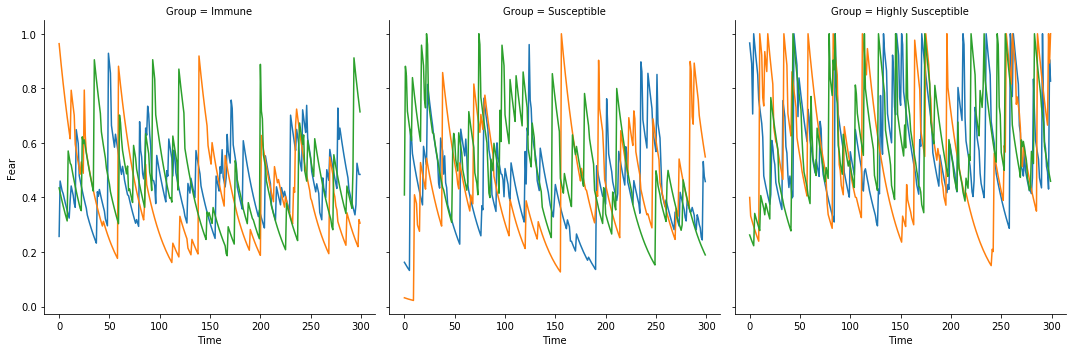

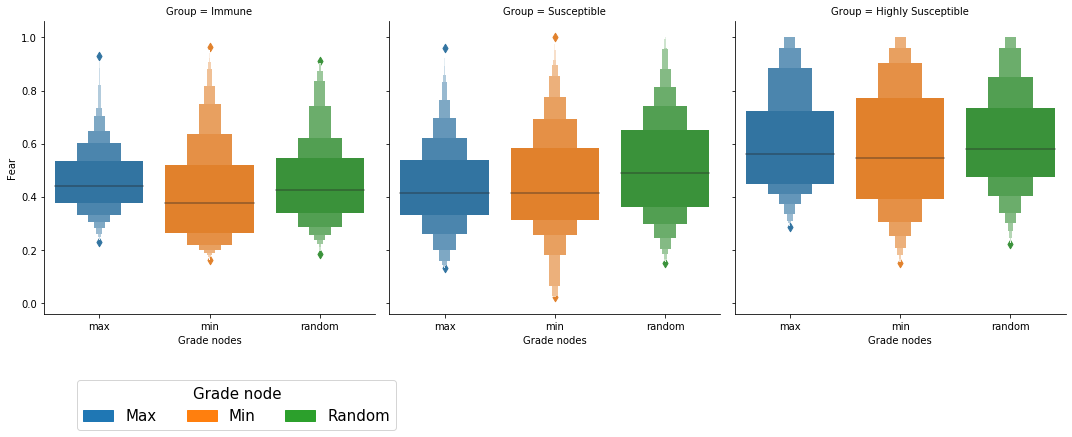

In [26]:
colors=sns.color_palette()[:3]
a=sns.relplot(data=X,x='Time',y='Fear',hue='Grade nodes',col='Group',kind='line',legend=False,palette=colors)
a=sns.catplot(data=X,y='Fear',x='Grade nodes',col='Group',kind='boxen',legend_out=True,palette=colors)
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,['Max','Min','Random'])]
plt.legend(handles=handles,title='Grade node',loc='best',ncol=3,
           fontsize='15',
           title_fontsize='15',
           bbox_to_anchor=(-1,-0.2))
plt.show()

In [27]:
fig=px.line(X,x='Time',y='Fear',color='Grade nodes',range_y=[0,1],facet_row='Group')
fig.show()

In [28]:
fig=px.violin(X,y='Fear',color='Grade nodes',facet_row='Group',category_orders={'Group':list(grupos.values())})
fig.show()

In [29]:
## modelo 1 vecino
modelo='g_1_v'

In [30]:
# Simulación miedo al crimen
S,conteo=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo,contar=True)
S=S.T
V['conections']=conteo

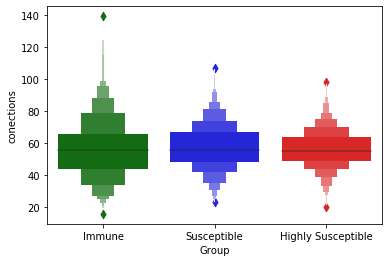

In [31]:
grade_violin=sns.boxenplot(data=V,y='conections',x='Group',order=list(grupos.values()),palette=['g','b','r'],saturation=0.7)

In [32]:
# Distibucion conexiones de los nodos por grupos en la simulacion
fig=px.violin(V,y='conections',box=True,color='Group',category_orders={'Group':list(grupos.values())})
fig.show()

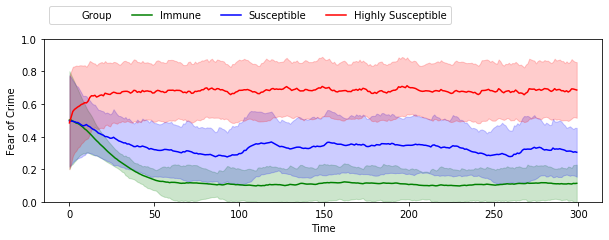

0.3560613651133533

In [33]:
plot(vertices,s0,lamda=lamda,psi=psi,nu=nu,
     mu=mu,modelo=modelo,T=T,draw=True,legends=grupos)

In [34]:
# indices de cada grupo con maximo grado, minimo grado y uno aleatorio
index_examples=[]
for g in grupos.values():
    index_examples.append([V[V.Group == g].conections.idxmax(),V[V.Group == g].conections.idxmin(),V[V.Group == g].conections.sample().index[0]])

In [35]:
## Convertir a formato que lee plotly
X=pd.DataFrame(index=np.arange(T*9))
X['Fear']=np.array([list(S[index_examples[i]].flatten()) for i in range(len(index_examples))]).flatten()
X['Time']=list(np.arange(T))*9
X['Group']=np.array([[list(grupos.values())[i]]*3*T for i in range(len(grupos))]).flatten()
X['Grade nodes']=(['max']*T+['min']*T+['random']*T)*3

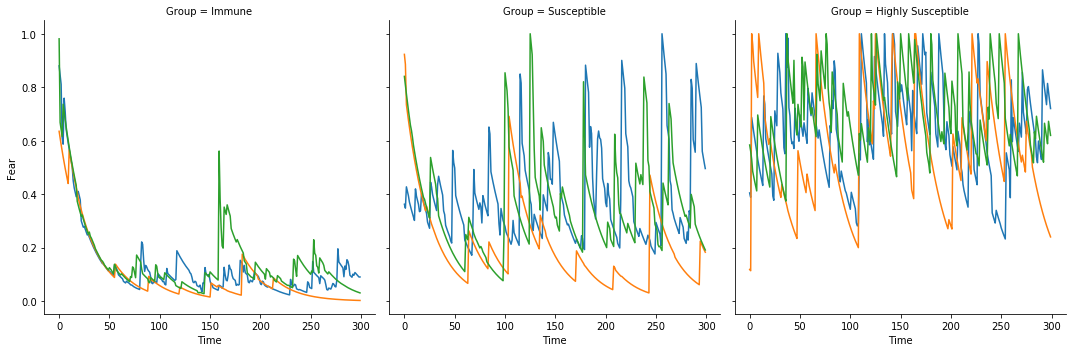

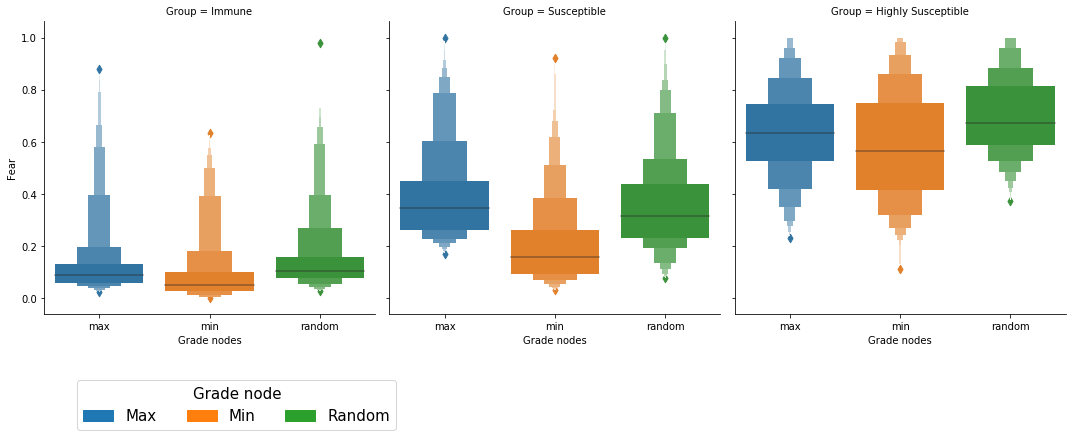

In [36]:
colors=sns.color_palette()[:3]
a=sns.relplot(data=X,x='Time',y='Fear',hue='Grade nodes',col='Group',kind='line',legend=False,palette=colors)
a=sns.catplot(data=X,y='Fear',x='Grade nodes',col='Group',kind='boxen',legend_out=True,palette=colors)
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,['Max','Min','Random'])]
plt.legend(handles=handles,title='Grade node',loc='best',ncol=3,
           fontsize='15',
           title_fontsize='15',
           bbox_to_anchor=(-1,-0.2))
plt.show()

In [37]:
fig=px.line(X,x='Time',y='Fear',color='Grade nodes',range_y=[0,1],facet_row='Group')
fig.show()

In [38]:
fig=px.violin(X,y='Fear',color='Grade nodes',facet_row='Group',category_orders={'Group':list(grupos.values())})
fig.show()